# Keras Exercise

## Predict political party based on votes

As a fun little example, we'll use a public data set of how US congressmen voted on 17 different issues in the year 1984. Let's see if we can figure out their political party based on their votes alone, using a deep neural network!

For those outside the United States, our two main political parties are "Democrat" and "Republican." In modern times they represent progressive and conservative ideologies, respectively.

Politics in 1984 weren't quite as polarized as they are today, but you should still be able to get over 90% accuracy without much trouble.

Since the point of this exercise is implementing neural networks in Keras, I'll help you to load and prepare the data.

Let's start by importing the raw CSV file using Pandas, and make a DataFrame out of it with nice column labels:

In [1]:
import pandas as pd
import numpy as np


feature_names =  ['party','handicapped-infants', 'water-project-cost-sharing', 
                    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                    'el-salvador-aid', 'religious-groups-in-schools',
                    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                    'mx-missle', 'immigration', 'synfuels-corporation-cutback',
                    'education-spending', 'superfund-right-to-sue', 'crime',
                    'duty-free-exports', 'export-administration-act-south-africa']

voting_data = pd.read_csv('house-votes-84.data.txt', na_values=['?'], 
                          names = feature_names)
voting_data.head(10)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


We can use describe() to get a feel of how the data looks in aggregate:

In [2]:
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


We can see there's some missing data to deal with here; some politicians abstained on some votes, or just weren't present when the vote was taken. We will just drop the rows with missing data to keep it simple, but in practice you'd want to first make sure that doing so didn't introduce any sort of bias into your analysis (if one party abstains more than another, that could be problematic for example.)

In [3]:
voting_data.dropna(inplace=True)
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


Our neural network needs normalized numbers, not strings, to work. So let's replace all the y's and n's with 1's and 0's, and represent the parties as 1's and 0's as well.

In [4]:
voting_data.replace(('y', 'n'), (1, 0), inplace=True)
voting_data.replace(('democrat', 'republican'), (1, 0), inplace=True)

In [5]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


Finally let's extract the features and labels in the form that Keras will expect:

In [6]:
all_features = voting_data[feature_names].drop('party', axis=1).values
all_classes = voting_data['party'].values
#print(np.size(all_classes))

OK, so have a go at it! You'll want to refer back to the slide on using Keras with binary classification - there are only two parties, so this is a binary problem. This also saves us the hassle of representing classes with "one-hot" format like we had to do with MNIST; our output is just a single 0 or 1 value.

Also refer to the scikit_learn integration slide, and use cross_val_score to evaluate your resulting model with 10-fold cross-validation.

**If you're using tensorflow-gpu on a Windows machine** by the way, you probably *do* want to peek a little bit at my solution - if you run into memory allocation errors, there's a workaround there you can use.

Try out your code here:

Epoch 1/16
 - 1s - loss: 0.7013 - accuracy: 0.4757
Epoch 2/16
 - 0s - loss: 0.6959 - accuracy: 0.4973
Epoch 3/16
 - 0s - loss: 0.6754 - accuracy: 0.6162
Epoch 4/16
 - 0s - loss: 0.3275 - accuracy: 0.9027
Epoch 5/16
 - 0s - loss: 0.2203 - accuracy: 0.9351
Epoch 6/16
 - 0s - loss: 0.0835 - accuracy: 0.9676
Epoch 7/16
 - 0s - loss: 0.0754 - accuracy: 0.9730
Epoch 8/16
 - 0s - loss: 0.0520 - accuracy: 0.9730
Epoch 9/16
 - 0s - loss: 0.0716 - accuracy: 0.9676
Epoch 10/16
 - 0s - loss: 0.0474 - accuracy: 0.9838
Epoch 11/16
 - 0s - loss: 0.0538 - accuracy: 0.9784
Epoch 12/16
 - 0s - loss: 0.0281 - accuracy: 0.9892
Epoch 13/16
 - 0s - loss: 0.0346 - accuracy: 0.9838
Epoch 14/16
 - 0s - loss: 0.0571 - accuracy: 0.9730
Epoch 15/16
 - 0s - loss: 0.0360 - accuracy: 0.9838
Epoch 16/16
 - 0s - loss: 0.0534 - accuracy: 0.9784
y_score sample:  [[9.2387199e-07]
 [1.5705824e-05]
 [9.8722696e-01]
 [9.9987316e-01]
 [9.9995637e-01]
 [9.9987316e-01]]
y_score dimensions:  (47, 1)


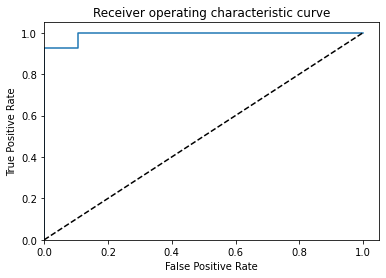

AUC: 0.992481


In [46]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc

#m = all_features.shape[1] #number of features
learning_rate = 0.1 # learning rate
mom = 0.9 # momentum

# Build an MLP neural net architecture

def initialise_MLP(all_features, learning_rate,mom):
    model = Sequential()
    
    model.add(Dense(4, kernel_initializer= "normal",input_dim = all_features.shape[1]))
    model.add(Activation("relu"))
    #model.add(Dropout(0.5))
    
    model.add(Dense(4, kernel_initializer= "normal"))
    model.add(Activation("relu"))
    #model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer= "normal"))
    model.add(Activation("sigmoid"))
    
    sgd = SGD(lr = learning_rate,decay = 1e-6,momentum = mom, nesterov = True)
    model.compile(loss = "binary_crossentropy",optimizer = sgd, metrics = ["accuracy"])
    
    return model

def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: %f' % roc_auc)

# Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(all_features,all_classes,test_size = 0.2)

y_train.shape = (y_train.shape[0],1)
y_test.shape = (y_test.shape[0],1)

"""
print("y_test dimensions: ", y_test.shape)
print("X_test dimensions: ", X_test.shape)
print("y_train dimensions: ", y_train.shape)
print("X_train dimensions: ", X_train.shape)
"""
# Train MLP on training data
model = initialise_MLP(all_features,learning_rate,mom)
model.fit(X_train,y_train,batch_size = 10, epochs = 16, verbose = 2, validation_data = None,shuffle = True, 
          class_weight = None, sample_weight = None)
"""
print("y_test sample: ", y_test[0:6])
print("y_test dimensions: ", y_test.shape)
print("X_test dimensions: ", X_test.shape)
print("y_train dimensions: ", y_train.shape)
print("X_train dimensions: ", X_train.shape)
"""
# Use trained model test on test dataset
y_score = model.predict(X_test)
print("y_score sample: ", y_score[0:6,])
print("y_score dimensions: ", y_score.shape)
generate_results(y_test[:, 0], y_score[:, 0])

## My implementation is below

# No peeking!

![title](peek.jpg)

This block is needed to prevent memory allocation errors on Windows when using tensorflow-gpu:

In [47]:
import tensorflow as tf
from tensorflow.keras.backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

In [48]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score

def create_model():
    model = Sequential()
    #16 feature inputs (votes) going into an 32-unit layer 
    model.add(Dense(32, input_dim=16, kernel_initializer='normal', activation='relu'))
    # Another hidden layer of 16 units
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (Democrat or Republican political party)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features, all_classes, cv=10)
print(cv_scores.mean())

0.9438405811786652


94% without even trying too hard! Did you do better? Maybe more neurons, more layers, or Dropout layers would help even more.